In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [149]:
#loding the dataset
df = pd.read_csv(r'/content/drive/MyDrive/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [151]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [152]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [153]:
df.dropna(inplace=True)

In [154]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Junior Research Scientist,1
Senior Product Development Manager,1
Junior Social Media Specialist,1


In [155]:
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(142)

In [156]:
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [157]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [158]:
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

/tmp/ipython-input-158-232192131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)


,count
Education Level,
Bachelor's,3021
Master's,1860
PhD,1369
High School,448


In [159]:
df['Gender'].value_counts()

,count
Gender,
Male,3671
Female,3013
Other,14


In [160]:
#detecting the outliers in the salary column using iqr method

Q1=df.Salary.quantile(0.25)
Q3=df.Salary.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [161]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [162]:
df[df.Salary< lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [163]:
# Create a ranking of Job Titles based on median Salary
title_salary = df.groupby('Job Title')['Salary'].median().sort_values()
title_rank = {title: rank for rank, title in enumerate(title_salary.index, start=1)}

# Map the ranks to the DataFrame
df['Job_Title_Rank'] = df['Job Title'].map(title_rank)

# Drop original Job Title column
df.drop('Job Title', axis=1, inplace=True)


In [164]:
df.head(15)

,Age,Gender,Education Level,Years of Experience,Salary,Job_Title_Rank
0,32.0,Male,Bachelor's,5.0,90000.0,23
1,28.0,Female,Master's,3.0,65000.0,34
2,45.0,Male,PhD,15.0,150000.0,20
3,36.0,Female,Bachelor's,7.0,60000.0,3
4,52.0,Male,Master's,20.0,200000.0,20
5,29.0,Male,Bachelor's,2.0,55000.0,16
6,42.0,Female,Master's,12.0,120000.0,40
7,31.0,Male,Bachelor's,4.0,80000.0,28
8,26.0,Female,Bachelor's,1.0,45000.0,21
9,38.0,Male,PhD,10.0,110000.0,20


In [165]:

df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
}, inplace=True)


df = pd.get_dummies(df, columns=['Gender', 'Education Level'], drop_first=True)

/tmp/ipython-input-165-3527029730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].replace({


In [166]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 70784889.92
Mean Absolute Error: 3246.02


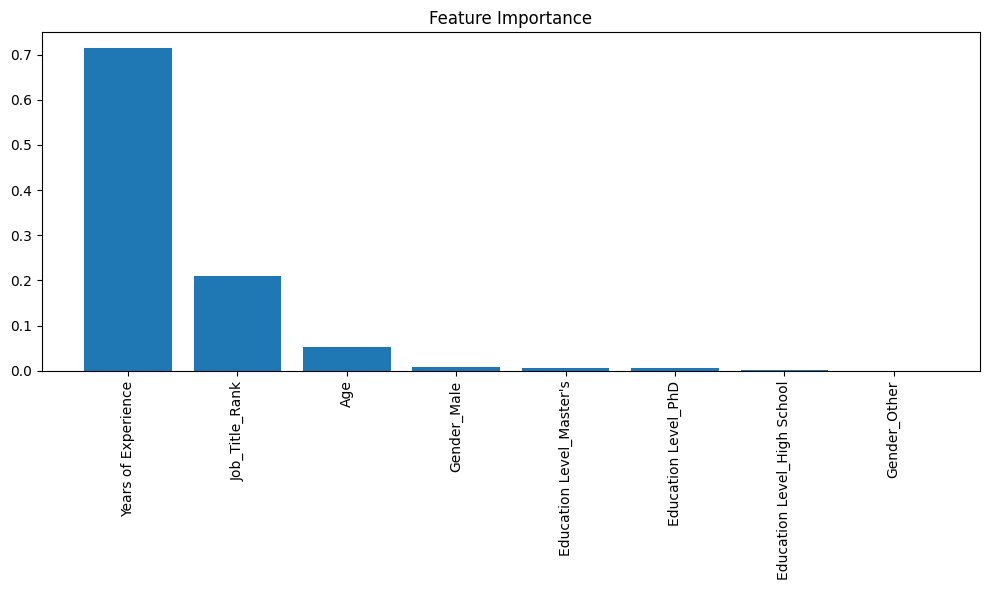

In [168]:
import matplotlib.pyplot as plt

# Feature importance from model
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [169]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [170]:
from sklearn.metrics import r2_score

# Use best model from GridSearchCV
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model Evaluation:")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")

Final Model Evaluation:
  R² Score: 0.9753
  MAE: 3228.23
  MSE: 70507056.54


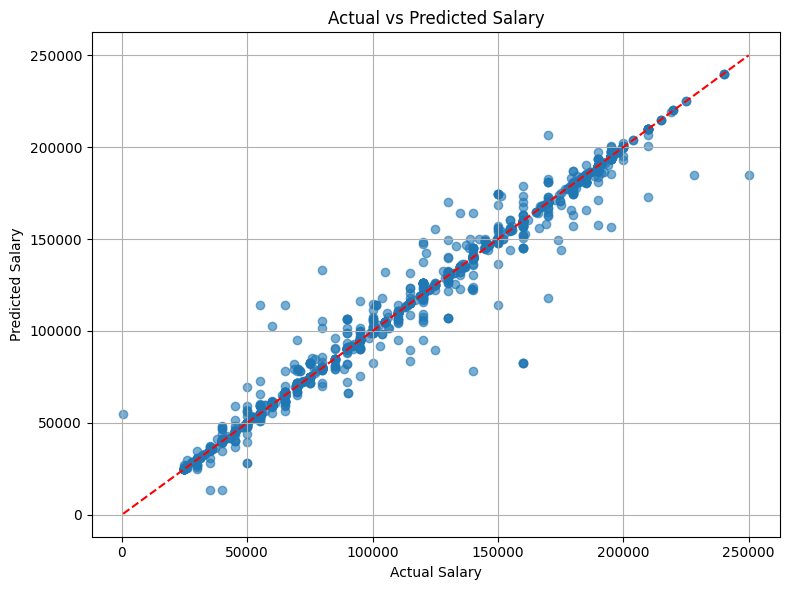

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.grid(True)
plt.tight_layout()
plt.show()

In [172]:
import joblib

joblib.dump(best_model, "final_salary_model.pkl")

['final_salary_model.pkl']

In [173]:
model = joblib.load("final_salary_model.pkl")

In [174]:
#Step 1: Get expected columns from training
expected_features = X.columns  # X is your training feature DataFrame

# Step 2: Create a new employee data item
new_data = pd.DataFrame({
    'Age': [30],
    'Years of Experience': [23],
    'Job_Title_Rank': [title_rank['Software Engineer']],
    'Gender_Male': [1],
    'Gender_Other': [0],  # add missing
    'Education Level_Master\'s': [1],
    'Education Level_PhD': [0],
    'Education Level_High School': [0]  # add if it was in original
})

In [175]:
# Step 3: Ensure all missing columns are filled with 0
for col in expected_features:
    if col not in new_data.columns:
        new_data[col] = 0

In [176]:
# Step 4: Ensure correct column order
new_data = new_data[expected_features]

# Step 5: Predict
predicted_salary = best_model.predict(new_data)
print(f"Predicted Salary: {predicted_salary[0]:,.2f}")

Predicted Salary: 158,372.94


In [177]:

#2nd employee data item
new_data2 = pd.DataFrame({
    'Age': [42],
    'Years of Experience': [18],
    'Job_Title_Rank': [title_rank['Software Engineer']],  # Change title as needed
    'Gender_Male': [0],
    'Gender_Other': [0],
    'Education Level_Master\'s': [0],
    'Education Level_PhD': [1],
    'Education Level_High School': [0]
})


In [178]:
# Step 3: Ensure all missing columns are filled with 0
for col in expected_features:
    if col not in new_data2.columns:
        new_data2[col] = 0

In [179]:
# Step 4: Ensure correct column order
new_data2 = new_data2[expected_features]

# Step 5: Predict
predicted_salary = best_model.predict(new_data2)
print(f"Predicted Salary: {predicted_salary[0]:,.2f}")

Predicted Salary: 141,645.20
